In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This will be an exploration of the 2019 Australian Open Final

In [2]:
events = pd.read_csv('data/events.csv')
points = pd.read_csv('data/points.csv')
rallies = pd.read_csv('data/rallies.csv')
serves = pd.read_csv('data/serves.csv')

In [3]:
events.head()

,Unnamed: 0,rallyid,frameid,strokeid,hitter,receiver,isserve,serve,type,stroke,hitter_x,hitter_y,receiver_x,receiver_y,time
0,0,1,70877,1,Djokovic,Nadal,True,first,serve,forehand,6.50,-0.24,1.03,27.44,0.00
1,1,1,70900,2,Nadal,Djokovic,False,first,slice,backhand,0.05,25.59,6.17,1.11,0.92
2,2,1,70950,3,Djokovic,Nadal,False,first,topspin,forehand,1.42,2.33,4.75,26.45,2.92
3,3,2,71488,1,Djokovic,Nadal,True,first,serve,forehand,4.48,-0.01,7.90,26.83,24.44
4,4,3,71796,1,Djokovic,Nadal,True,second,serve,forehand,4.48,-0.37,7.88,26.47,36.76


In [4]:
points.head()

,Unnamed: 0,rallyid,server,returner,winner,reason,serve,strokes,totaltime,x,y,score
0,0,1,Djokovic,Nadal,Djokovic,winner,first,3,0.92,1.92,21.96,"0:0, 15:0"
1,2,3,Djokovic,Nadal,Djokovic,out,second,4,4.16,3.33,-0.39,"0:0, 30:0"
2,4,5,Djokovic,Nadal,Djokovic,ace,second,2,0.40,1.62,17.18,"0:0, 40:0"
3,5,6,Djokovic,Nadal,Djokovic,net,first,10,10.40,6.41,12.78,"1:0, 0:0"
4,7,8,Nadal,Djokovic,Djokovic,out,second,7,7.20,0.50,18.67,"1:0, 15:0"


In [5]:
rallies.head()

,Unnamed: 0,rallyid,server,returner,winner,reason,serve,strokes,totaltime,x,y
0,0,1,Djokovic,Nadal,Djokovic,winner,first,3,0.92,1.92,21.96
1,1,2,Djokovic,Nadal,__undefined__,second_serve,first,1,0.00,7.42,12.10
2,2,3,Djokovic,Nadal,Djokovic,out,second,4,4.16,3.33,-0.39
3,3,4,Djokovic,Nadal,__undefined__,second_serve,first,1,0.00,4.64,17.69
4,4,5,Djokovic,Nadal,Djokovic,ace,second,2,0.40,1.62,17.18


In [6]:
serves.head()

,Unnamed: 0,rallyid,server,x,y
0,0,1,Djokovic,1.86,16.80
1,1,3,Djokovic,7.05,16.97
2,2,6,Djokovic,8.04,17.80
3,3,8,Nadal,4.44,16.24
4,4,9,Nadal,5.71,16.40


In [7]:
points.winner.value_counts()

Djokovic    89
Nadal       53
Name: winner, dtype: int64

In [8]:
points.reason.value_counts()

out             49
winner          43
net             37
ace             11
double_fault     2
Name: reason, dtype: int64

In [9]:
points[points['reason'] == 'ace']

,Unnamed: 0,rallyid,server,returner,winner,reason,serve,strokes,totaltime,x,y,score
2,4,5,Djokovic,Nadal,Djokovic,ace,second,2,0.4,1.62,17.18,"0:0, 40:0"
12,18,19,Djokovic,Nadal,Djokovic,ace,first,1,0.0,1.62,10.23,"3:0, 0:0"
21,30,31,Djokovic,Nadal,Djokovic,ace,first,1,0.0,4.63,16.10,"3:1, 15:0"
23,32,33,Djokovic,Nadal,Djokovic,ace,first,1,0.0,4.23,18.13,"3:1, 40:0"
52,77,78,Djokovic,Nadal,Djokovic,ace,first,1,0.0,2.91,29.27,"6:3 0:1, 40:0"
67,97,98,Nadal,Djokovic,Nadal,ace,first,1,0.0,-1.11,26.94,"6:3 2:2, 30:15"
86,125,126,Djokovic,Nadal,Djokovic,ace,first,1,0.0,1.78,8.86,"6:3 5:2, 30:0"
87,126,127,Djokovic,Nadal,Djokovic,ace,first,1,0.0,4.61,7.91,"6:3 5:2, 40:0"
88,127,128,Djokovic,Nadal,Djokovic,ace,first,1,0.0,1.40,8.41,"6:3 6:2 0:0, 0:0"
111,162,163,Nadal,Djokovic,Nadal,ace,first,1,0.0,11.29,25.49,"6:3 6:2 3:1, 0:30"


In [10]:
points[points['reason'] == 'double_fault']

,Unnamed: 0,rallyid,server,returner,winner,reason,serve,strokes,totaltime,x,y,score
81,118,119,Nadal,Djokovic,Djokovic,double_fault,second,1,0.0,4.75,12.03,"6:3 4:2, 15:15"
101,150,151,Nadal,Djokovic,Djokovic,double_fault,second,1,0.0,4.63,6.29,"6:3 6:2 1:1, 30:15"


In [26]:
total_points = points[['rallyid', 'winner']].groupby('winner').count()
total_points.columns=['points won']
total_points['percentage'] = (total_points['points won']/total_points['points won'].sum())*100
total_points

,points won,percentage
winner,,
Djokovic,89,62.676056
Nadal,53,37.323944


In [21]:
points.groupby(['winner','serve']).count().iloc[:,:1]

Unnamed: 0
winner   serve             
Djokovic first           62
         second          27
Nadal    first           36
         second          17

In [22]:
points.groupby(['reason']).count().iloc[:,:1]

,Unnamed: 0
reason,
ace,11
double_fault,2
net,37
out,49
winner,43


In [11]:
overall_points = points.groupby(['winner', 'reason']).count().iloc[:,:1]
overall_points.columns=['points won']
overall_points['percentage'] = (overall_points['points won']/overall_points['points won'].sum())*100
overall_points

points won  percentage
winner   reason                              
Djokovic ace                    8    5.633803
         double_fault           2    1.408451
         net                   23   16.197183
         out                   30   21.126761
         winner                26   18.309859
Nadal    ace                    3    2.112676
         net                   14    9.859155
         out                   19   13.380282
         winner                17   11.971831

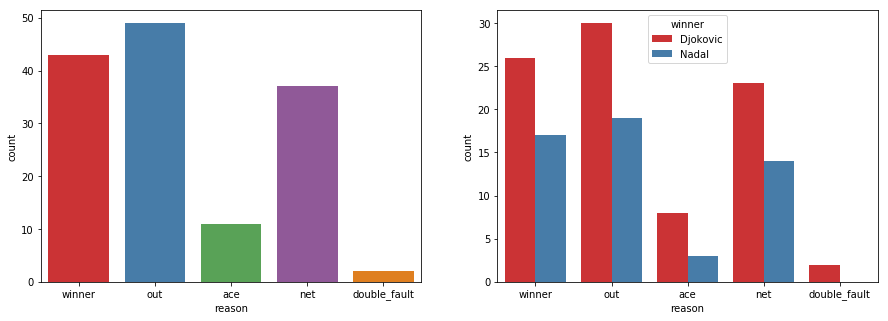

In [12]:
f, axes = plt.subplots(1,2, figsize=(15,5))
sns.countplot(x='reason', data=points, ax=axes[0], palette='Set1')
sns.countplot(x='reason', hue='winner', data=points, palette='Set1')

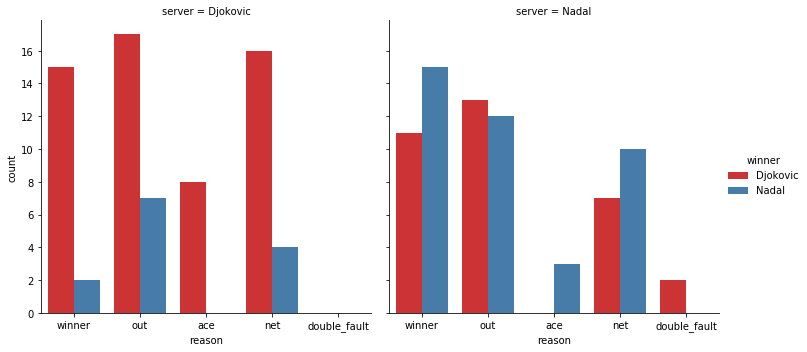

In [13]:
sns.catplot(x='reason', hue='winner', col='server', data=points, kind='count', palette='Set1')

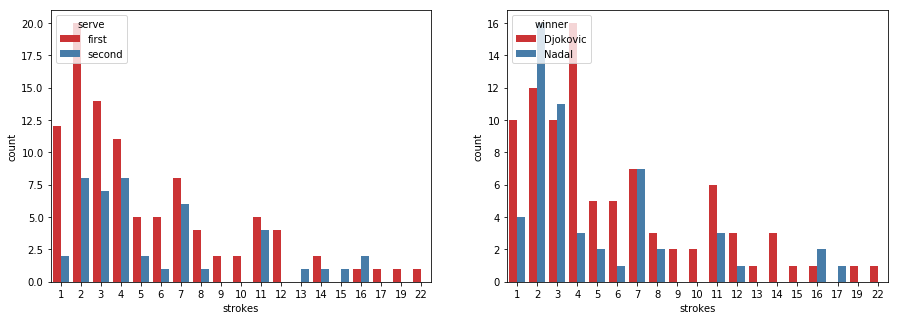

In [31]:
f, axes = plt.subplots(1,2, figsize=(15,5))
sns.countplot(x='strokes', hue='serve', data=points, palette='Set1', ax=axes[0])
sns.countplot(x='strokes', hue='winner', data=points, palette='Set1', ax=axes[1])

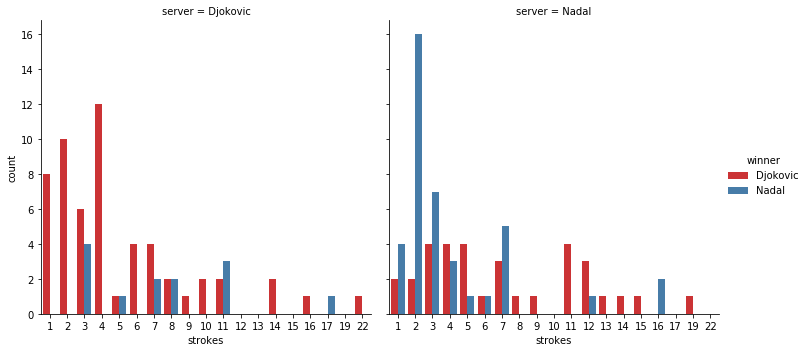

In [37]:
sns.catplot(x='strokes', hue='winner', col='server', data=points, kind='count', palette='Set1')